# Exercise 4.9

Implement value iteration for the gambler’s problem and solve it for $p_h = 0.25$ and $p_h = 0.55$. 

In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. 

Show your results graphically, as in Figure 4.3. Are your results stable as $\theta \rightarrow 0$?

![Gambler's Problem](ex4.3.png)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def gambler_value_iteration(ph, theta: float = 1e-10):
    V = np.zeros(101)
    V[0] = 0.0
    V[100] = 1.0
    policy = np.zeros(100)
    V_iterations = []
    iterations = 0

    while True:
        iterations += 1
        delta = 0

        for s in range(1, 100):
            V_old = V[s]
            best_value = float("-inf")
            best_action = 0

            # Consider all possible bets
            for a in range(1, min(s + 1, 100 - s + 1)):
                # Calculate value for winning and losing
                win_state = s + a
                lose_state = s - a

                # Ensure states are within bounds
                if win_state > 100:
                    win_state = 100
                if lose_state < 0:
                    lose_state = 0

                # Calculate expected value
                value = ph * V[win_state] + (1 - ph) * V[lose_state]

                # Update best action
                if (
                    value > best_value + theta
                ):  # Use theta as numerical stability threshold
                    best_value = value
                    best_action = a
                elif abs(value - best_value) < theta:
                    # If values are effectively equal, take the more conservative bet
                    best_action = min(best_action, a)

            # Update value function and policy
            V[s] = best_value
            policy[s] = best_action

            delta = max(delta, abs(V[s] - V_old))

        print(f"Value Iteration {iterations}, delta: {delta}")
        V_iterations.append(V.copy())

        if delta < theta:
            print("Value Iteration converged!")
            break

    return V, policy, V_iterations


In [92]:
# Visualization
def plot_gambler_results(ph, save_sweeps=True):
    V, policy, V_iterations = gambler_value_iteration(ph, theta=0.0001)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot value function
    ax1.plot(range(len(V)), V, "k-", label="Final value\nfunction")

    if save_sweeps:
        # Plot sweep 1 (blue), 2 (red), 3 (green), 32 (orange)
        colors = ["blue", "red", "green", "orange"]
        sweeps_to_plot = [0, 1, 2, 31]  # Index 31 is sweep 32 since we're 0-indexed

        for i, sweep_idx in enumerate(sweeps_to_plot):
            if sweep_idx < len(V_iterations):  # Make sure we have enough iterations
                ax1.plot(
                    range(len(V_iterations[sweep_idx])),
                    V_iterations[sweep_idx],
                    color=colors[i],
                    label=f"sweep {sweep_idx+1}",
                )

    # Plot final value function in black
    ax1.plot(range(len(V)), V, "k-", label="Final value\nfunction")

    ax1.set_xlabel("Capital")
    ax1.set_ylabel("Value estimates")
    ax1.set_xlim([1, 99])
    ax1.set_ylim([0, 1])
    ax1.legend()

    # Plot final policy
    ax2.bar(np.arange(1, 100), policy[1:])
    ax2.set_xlabel("Capital")
    ax2.set_ylabel("Final policy\n(stake)")
    ax2.set_xlim([1, 99])
    ax2.set_ylim([0, 50])

    plt.tight_layout()
    return V, policy


Value Iteration 1, delta: 0.9533440000000001
Value Iteration 2, delta: 0.3688960000000001
Value Iteration 3, delta: 0.13926400000000003
Value Iteration 4, delta: 0.055705600000000015
Value Iteration 5, delta: 0.02228224000000001
Value Iteration 6, delta: 0.008912896000000003
Value Iteration 7, delta: 0.0016384000000000008
Value Iteration 8, delta: 0.00039321600000000005
Value Iteration 9, delta: 7.602595430400167e-05
Value Iteration converged!


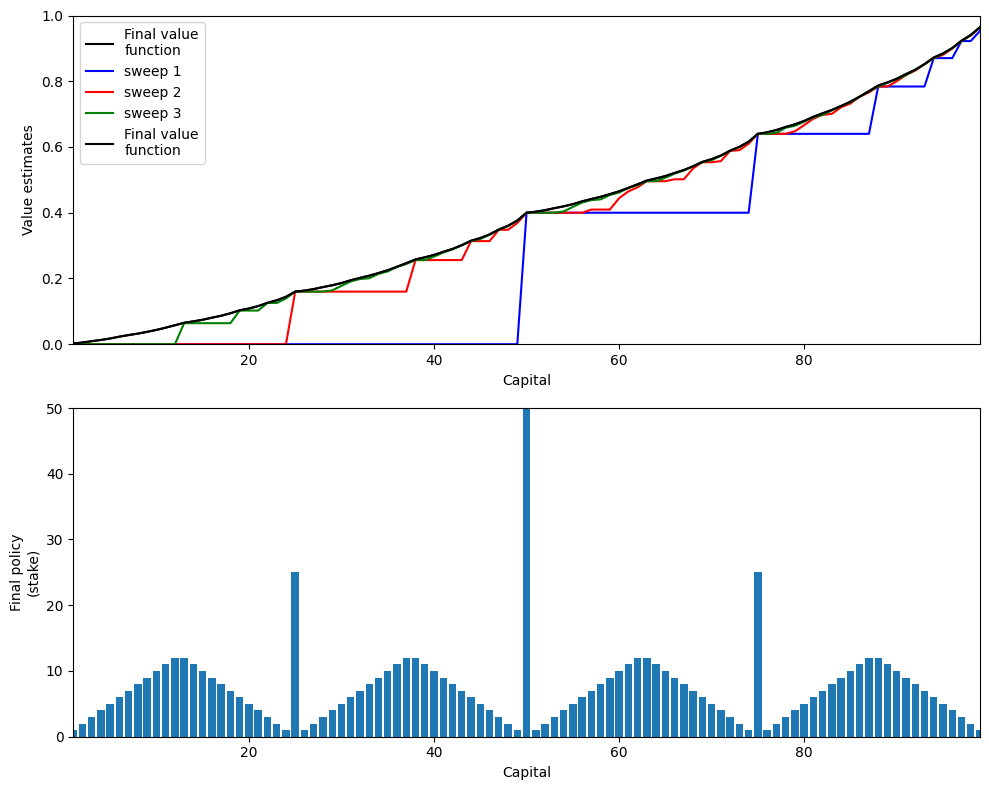

In [93]:
V, policy = plot_gambler_results(0.4)

Value Iteration 1, delta: 0.822021484375
Value Iteration 2, delta: 0.190673828125
Value Iteration 3, delta: 0.042724609375
Value Iteration 4, delta: 0.01068115234375
Value Iteration 5, delta: 0.0026702880859375
Value Iteration 6, delta: 0.000667572021484375
Value Iteration 7, delta: 7.040798664093018e-05
Value Iteration converged!


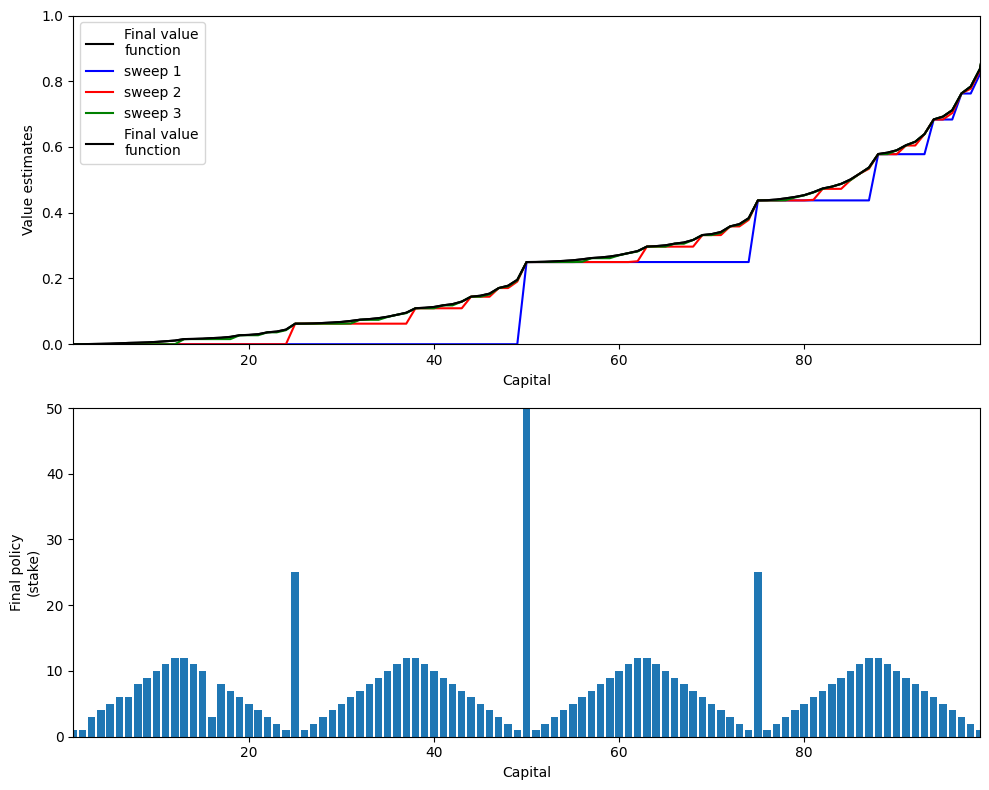

In [95]:
V, policy = plot_gambler_results(0.25)


Value Iteration 1, delta: 0.991696234375
Value Iteration 2, delta: 0.539850953125
Value Iteration 3, delta: 0.29009560937500006
Value Iteration 4, delta: 0.15955258515625004
Value Iteration 5, delta: 0.08775392183593753
Value Iteration 6, delta: 0.04826465700976564
Value Iteration 7, delta: 0.015224352343750011
Value Iteration 8, delta: 0.01080733552400559
Value Iteration 9, delta: 0.01011059257135849
Value Iteration 10, delta: 0.009529043425888284
Value Iteration 11, delta: 0.009059588103388472
Value Iteration 12, delta: 0.008618311926306466
Value Iteration 13, delta: 0.008253124649326593
Value Iteration 14, delta: 0.007924213057284746
Value Iteration 15, delta: 0.00767021734985901
Value Iteration 16, delta: 0.007318230974498685
Value Iteration 17, delta: 0.007188332306586109
Value Iteration 18, delta: 0.006915263788410231
Value Iteration 19, delta: 0.006679393206684869
Value Iteration 20, delta: 0.006471643034330232
Value Iteration 21, delta: 0.00633414111124686
Value Iteration 22, d

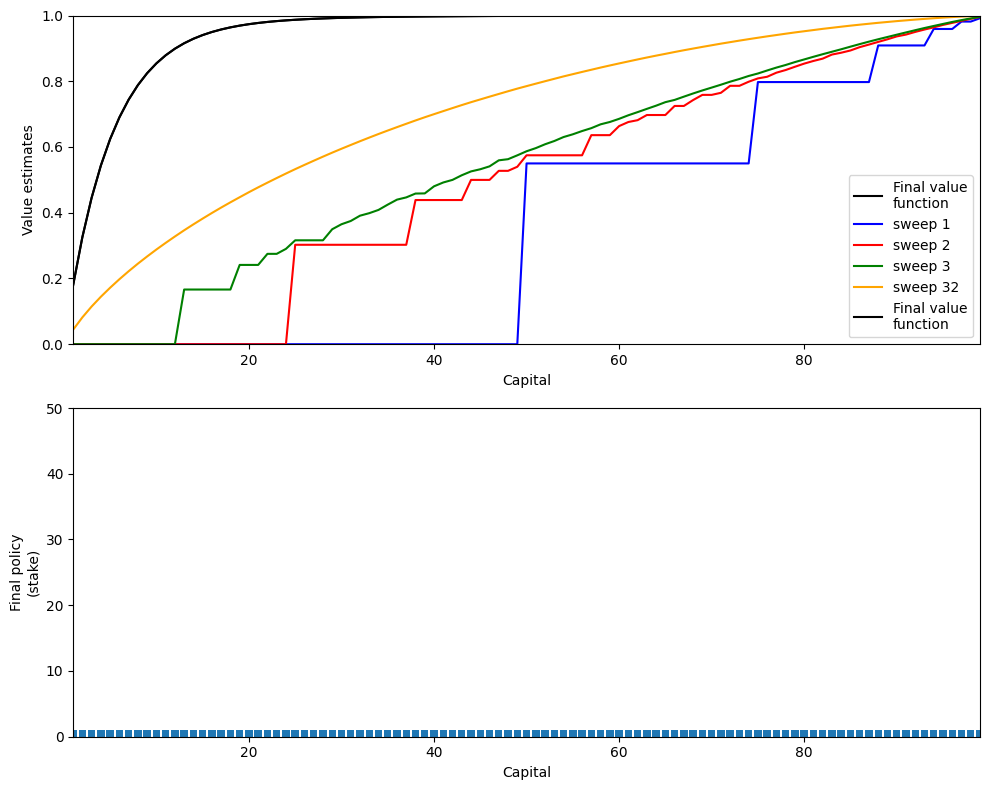

In [96]:
V, policy = plot_gambler_results(0.55)
